In [15]:
import nltk
import pandas as pd
import glob
import re
import sys
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [14]:
path =r'movies_txt_storylines' # use your path
allFiles = glob.glob(path + "/*.txt")
frame = pd.DataFrame()
list_ = []
for index, file_ in enumerate(allFiles):
    df = pd.read_csv(file_,sep=';;;',header=None)
    df.columns = ['synopses']
    file_ = file_.split("/")
    file_ = file_[1].split("_")
    genre = file_[1].split(".")
    genre2 = re.sub('\d+', '', genre[0])
    df['title'] = file_[0]
    df['genre'] = genre2
    
    list_.append(df)

frame = pd.concat(list_)
frame

ValueError: No objects to concatenate

In [ ]:
frame['synopses'] = frame['synopses'].map(lambda x: re.sub(r'[^a-zA-Z_0-9\s]', '', str(x)))
frame

In [ ]:
frame.to_csv('synopses_movies_all_4.csv', sep=';', encoding='utf-8')

In [ ]:
corpus_comedy = df['genre'] = 'comedy'
corpus_comedy

In [ ]:
my_tags = ['romance' , 'action', 'comedy', 'fantasy']
frame.tag.value_counts().plot(kind="bar", rot=0)

In [16]:
## TOKENIZATION ##

from nltk.tokenize import word_tokenize

# Open file:
with open('fantasy0.txt', 'r') as file:
    for line in file:    
        # Split file into words: words
        tokens = word_tokenize(line)
        # Convert the tokens into lowercase: lower_tokens
        lower_tokens = [t.lower() for t in tokens]

# Print the unique tokens result
print(set(lower_tokens))


{'peace', 'two', 'osgiliath', 'they', "'s", 'dead', 'reforged', 'discovered', 'open', 'attraction', 'staring', 'each', 'bare', 'shirt', 'essence', 'hears', 'hill', 'weathertop', 'preparing', 'lane', 'rohirrim', 'ship', 'last', 'marries', 'denethor', 'burn', 'ram', 'undying', 'help', 'crosses', 'attacks', 'get', 'just', 'briefly', 'out', 'ships', 'sends', 'survived', 'rising', 'doubt', 'collapses', 'wood', 'presents', 'pose', 'against', 'harad', 'darker', 'fangorn', 'control', 'when', 'eating', 'closer', 'do', 'narsil', 'bloom', 'dourif', 'dropping', 'shows', 'outskirts', 'orlando', 'concerns', 'squabble', 'aragorn', 'puts', 'fades', 'billy', 'sees', 'faramir', 'reveals', 'with', 'andy', 'flame', 'wife', 'recovers', 'ahead', 'abandon', 'pour', 'ensuing', 'powerful', 'sacrifice', 'towards', 'rest', 'wounds', 'on', 'effect', 'surrounded', 'orthanc', 'boyd', 'sadwyn', 'minas', 'were', 'members', 'rosie', 'dispatches', 'lives', 'wards', 'turns', 'rejoices', 'little', 'offers', 'thence', 'fi

In [17]:
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [18]:
## BAG OF WORDS ##

# Count number of occurences of each token
count = Counter(lower_tokens)

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Get a list of english stopwords
english_stops = set(stopwords.words('english'))

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize (group together the inflected forms of a word 
# so they can be analysed as a single item) all tokens into a new list: lemmatized

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('frodo', 27), ('sam', 25), ('aragorn', 23), ('gollum', 21), ('gandalf', 17), ('ring', 16), ('pippin', 15), ('faramir', 12), ('mina', 11), ('orcs', 11)]


In [7]:
import gensim

In [37]:
## GENSIM CORPUS ##
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the <<list of token lists for each file>>: dictionary ??????????????????????
dictionary = Dictionary(files)

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(file) for file in files]

# Print the first 10 word ids with their frequency counts from the first document
print(corpus[0][:10])


In [41]:
## TF - IDF ##

from gensim.models.tfidfmodel import TfidfModel


# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[bow]


# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id),weight)


NameError: name 'corpus' is not defined

In [9]:
## Named Entity Recognition with spaCy ##

import spacy

# Convert list of alpha-numeric tokens into a string: string 
alphanum = [t for t in tokens if t.isalpha()]
string=' '.join(set(alphanum))

# Load spacy model for English: nlp
nlp = spacy.load('en_core_web_sm', tagger=False, parser=False, matcher=False)

# Process whole documents
doc = nlp(string)

# Create a list of NERs
ner=[]
for entity in doc.ents:
    ner.append(entity.text)
    print(entity.text, entity.label_)

Weaving Gollum PERSON
Anduril PERSON
Beasts NORP
Boromir Gimli PERSON
Rohan GPE
Mindolluin GPE
Rivendell PERSON
Eagles ORG
Realizing Bilbo ORG
Christopher PERSON
Arwen PERSON
Merry PERSON
Brad PERSON
David PERSON
Aragorn Boyd PERSON
Ian PERSON
Army ORG
Shire PERSON
Deep PERSON
Galadriel ORG
Bernard Orthanc PERSON
Karl McKellen PERSON
first ORDINAL
Sam PERSON
Bag PERSON
Pippin ORG
Monaghan PERSON
Fields PERSON
Grey PERSON
trolls War catapulting EVENT
Wood LOC
Isildur GPE
ten CARDINAL
Frodo ORG
Legolas PERSON
Rohirrim NORP
noon TIME
Morgul GPE
Wenham PERSON
Brophy Eldarion ORG
John NazgĂ PERSON
Rosie PERSON
Tyler PERSON
Hugo EVENT
Noble ORG
McLeod Gate ORG
Hill ORG
Andy MĂ PERSON
Bean PERSON
Nazgul PERSON
two CARDINAL
Treebeard PERSON
Havens PERSON
Gondorian NORP
Steward PERSON
Battle PERSON
Ungol PERSON
West LOC
Suffering GPE
Gondorians NORP
Grond GPE
One CARDINAL
half CARDINAL
Straight Middle LOC
Otto PERSON
Liv Sarah PRODUCT
Thomas PERSON
Crack PERSON
Hallows ORG
City PRODUCT
Grima PE

In [13]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [37]:
# Remove all NER: no_ner
no_ner = [t.lower() for t in set(lemmatized) if t not in ner]

# Print unique no-NER tokens
print(set(no_ner))

{'rivendell', 'solace', 'finally', 'forest', 'shatters', 'pain', 'cirith', 'sauron', 'nick', 'faction', 'lied', 'knife', 'terror', 'city', 'merry', 'hooded', 'victory', 'promise', 'edge', 'long', 'show', 'likewise', 'center', 'lava', 'open', 'bag', 'headed', 'massacring', 'abandon', 'collapse', 'honorable', 'wall', 'recognises', 'decides', 'swears', 'ensuing', 'keeping', 'start', 'order', 'belief', 'succumbs', 'dangerous', 'sword', 'try', 'earth', 'rider', 'son', 'captain', 'wound', 'trapped', 'shire', 'legolas', 'enemy', 'affection', 'straight', 'prepares', 'fellowship', 'strangles', 'elrond', 'locate', 'suddenly', 'injury', 'mcleod', 'intervenes', 'rest', 'set', 'see', 'ship', 'force', 'monaghan', 'karl', 'ram', 'solitary', 'rock', 'master', 'mortensen', 'leading', 'squabble', 'true', 'mind', 'hugo', 'reforge', 'saying', 'assuming', 'curiosity', 'orcs', 'refuse', 'soldier', 'rosie', 'recovers', 'death', 'eye', 'birthday', 'last', 'surviving', 'stair', 'ordeal', 'surrounding', 'weavin

In [21]:
## WORDCLOUDS ##

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def make_word_cloud(input_text, mask, output_file_name, stopwords=None, bckgrd_color = "white", max_words=20000):

    # Read the whole text
    text = open(input_text).read()
    # Load the mask image
    mask = np.array(Image.open(mask))
    # Load stop word list
    stopwords = set(english_stops)
    # Call WordCloud
    wc = WordCloud(background_color=bckgrd_color, max_words=max_words,mask=mask, stopwords=stopwords)

    # Generate word cloud
    wc.generate(text)
    # Write to file
    wc.to_file('cloud_fantasy0.jpg')
    
make_word_cloud(input_text="fantasy0.txt", mask="images.jpg",output_file_name="cloud_fantasy0.jpg", stopwords=english_stops)

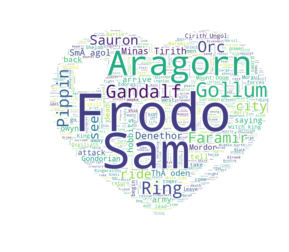

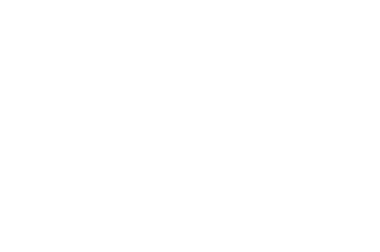

In [40]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud


# Read the whole text.
text = open("fantasy0.txt").read()

# read the mask image
maska = np.array(Image.open("romance_mask.jpg"))

wc = WordCloud(background_color="white", max_words=2000, mask=maska, stopwords=english_stops)
# generate word cloud
wc.generate(text)
wc.to_file("cloud_fantasy0.jpg")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()